# Train IDS classifier
Notebook for documentation of classifier training outputs (in addition to saved training logs). 

The classifier is used for evaluating the generated flows by the GAN.

## Train classifier including BENIGN flows

In [1]:
! python3 train_classifier.py

Args: Namespace(n_estimators=100, save_dir='./models/classifier', seed=0)
Loading dataset...

Making Classifier...

Starting training...
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100

## Train classifier without BENIGN flows

In [83]:
! python3 train_classifier.py --remove_benign --cross_validate

Args: Namespace(cross_validate=True, data_path='./data/cic-ids-2017_splits_with_benign/seed_0/', n_estimators=100, remove_benign=True, save_dir='./models/classifier', seed=0)
Loading dataset...

Making Classifier...

Cross validating...
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  

## Feed unscaled testing data

In [115]:
import joblib 
from cic_ids_17_dataset import CIC17Dataset
from scikitplot.metrics import plot_confusion_matrix

data_path = "./data/cic-ids-2017_splits/seed_0/"
test_dataset = CIC17Dataset(data_path + "test_dataset_scaled.pt", is_scaled=True)
classifier = joblib.load("./models/classifier/20-05-2021_12h01m/classifier.gz")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


/Users/thomas/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/thomas/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


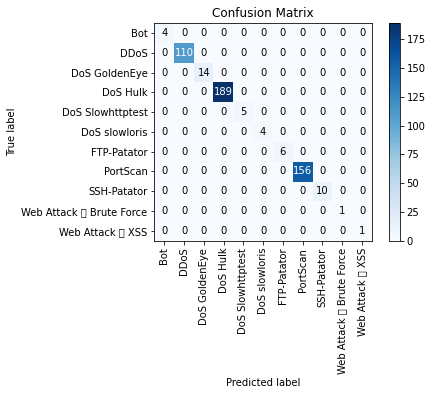

In [118]:
X = test_dataset.X[:500]
y = test_dataset.y[:500]
X_unscaled = test_dataset.scaler.inverse_transform(X)
y_preds = classifier.predict(X_unscaled)

y = test_dataset.label_encoder.inverse_transform(y)
y_preds = test_dataset.label_encoder.inverse_transform(y_preds)
# i.e., unscaling is not the probelm
plot_confusion_matrix(y, y_preds, x_tick_rotation=90)